In [131]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2021-04-22T23:06:22.270565+02:00

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



On this part, data cleaning allow dataset to be properly build to create predictive models  

#### Description

We are using the same dataset for our Exploratory Data Analysis.

The dataset gathers relevant information in regards US vehicles manufactured since 1985. The mentioned information includes technical details (cylinders, displ, transmission) and environmental details
(gasoline consumption, CO2 emissions)

The original dataset can be found at: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip The dataset used is a lighter version of the original (less columns)

Original dataset description http://www.fueleconomy.gov/feg/ws/index.shtml#ft7

In regards data analysis, we detect the following errors on the original:

· 1506 duplicated records
· Displ, cylinders, transmission and drive_wheels variables contains non-existent values
· There exist an outlier found on the quantity of cars for the year 2018
· There exist hybrid cars and electrical cars (the later have been removed because they do not emit pollution)
· Consumption variable is defined by miles per galon and CO2_emissions by grames per mile. Since CO2 is the main variable of the dataset, we have created the variable contumption_litres_mile which is defined as liters by miles in order to be able to compare it with CO2



In [132]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)

In [133]:
vehicles = (pd
            .read_csv("../data/vehiculos_original.csv")
           .rename(columns={
               'make': 'manufacturer',
               'model': 'model',
               'year': 'year',
               'displ': 'displ', #Displacement volume of the engine
               'cylinders':'cylinders',
               'trany':'transmission',
               'drive':'drive_wheels',
               'VClass': 'Class',
               'fuelType':'fuelType',
               'comb08':'consumption', #combined Miles per galon for fuelType
               'co2TailpipeGpm': 'CO2_emissions', # tailpipe CO2 in grams/mile
           })
           .query("CO2_emissions>0"))

In [134]:
vehicles.shape

(38297, 11)

### Duplicaded records

Pandas´ function drop_duplicates remove duplicated records

In [135]:
vehicles = vehicles.drop_duplicates()

In [136]:
vehicles.shape

(36791, 11)

### Outliers values

In [137]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != object:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])
            print("{} | {} | {} ".format(
                df[column].name,
                n_outliers,
            df[column].dtype
        ))
outliers_col(vehicles)            

year | 0 | int64 
displ | 0 | float64 
cylinders | 0 | float64 
consumption | 400 | int64 
CO2_emissions | 221 | float64 


In [138]:
vehicles.describe()

,year,displ,cylinders,consumption,CO2_emissions
count,36791.000000,36789.000000,36788.000000,36791.000000,36791.000000
mean,2000.787421,3.321786,5.746493,20.012068,473.185008
std,10.374662,1.359945,1.758009,5.109608,118.833905
min,1984.000000,0.600000,2.000000,7.000000,29.000000
25%,1991.000000,2.200000,4.000000,17.000000,386.391304
50%,2002.000000,3.000000,6.000000,19.000000,466.000000
75%,2010.000000,4.300000,6.000000,23.000000,555.437500
max,2018.000000,8.400000,16.000000,58.000000,1269.571429


In [139]:
min_consumption = vehicles.consumption.mean() - 3*vehicles.consumption.std()
max_consumption = vehicles.consumption.mean() + 3*vehicles.consumption.std()
print(min_consumption, max_consumption)

co2_min = vehicles.CO2_emissions.mean() - 3*vehicles.CO2_emissions.std()
co2_max = vehicles.CO2_emissions.mean() + 3*vehicles.CO2_emissions.std()
print(co2_min, co2_max)


4.683245232912929 35.34089110477835
116.68329326823994 829.6867227313918


In [140]:
vehicles = vehicles[
    (np.abs(stats.zscore(vehicles.consumption)) < 3) & \
    (np.abs(stats.zscore(vehicles.CO2_emissions)) < 3)
]

In [141]:
vehicles.shape

(36185, 11)

In [142]:
vehicles.describe()

,year,displ,cylinders,consumption,CO2_emissions
count,36185.000000,36183.000000,36182.000000,36185.000000,36185.000000
mean,2000.799281,3.326051,5.750290,19.842366,473.442286
std,10.342556,1.340777,1.733438,4.587177,110.906946
min,1984.000000,0.900000,2.000000,9.000000,144.000000
25%,1991.000000,2.200000,4.000000,17.000000,394.000000
50%,2002.000000,3.000000,6.000000,19.000000,467.736842
75%,2010.000000,4.300000,6.000000,23.000000,552.000000
max,2018.000000,8.400000,12.000000,35.000000,829.000000


In spite of eliminating outliers, new outliers are generated since the dataset distribution is changed as well. 

In [143]:
outliers_col(vehicles)

year | 0 | int64 
displ | 0 | float64 
cylinders | 0 | float64 
consumption | 213 | int64 
CO2_emissions | 424 | float64 


In order to eliminate them, we repeat the process until no outliers are left 

In [144]:
vehicles = vehicles[
    (np.abs(stats.zscore(vehicles.consumption)) < 3) & \
    (np.abs(stats.zscore(vehicles.CO2_emissions)) < 3)
]

In [145]:
vehicles.shape

(35548, 11)

In [146]:
vehicles.describe()

,year,displ,cylinders,consumption,CO2_emissions
count,35548.000000,35546.000000,35545.000000,35548.00000,35548.000000
mean,2000.895578,3.309211,5.728091,19.86123,470.670340
std,10.308809,1.318826,1.705855,4.38558,104.537771
min,1984.000000,1.000000,2.000000,9.00000,144.000000
25%,1991.000000,2.200000,4.000000,17.00000,396.000000
50%,2002.000000,3.000000,6.000000,19.00000,465.000000
75%,2010.000000,4.300000,6.000000,23.00000,526.000000
max,2018.000000,8.400000,12.000000,33.00000,796.000000


In [147]:
outliers_col(vehicles)

year | 0 | int64 
displ | 0 | float64 
cylinders | 0 | float64 
consumption | 0 | int64 
CO2_emissions | 9 | float64 


In [148]:
vehicles = vehicles[
    (np.abs(stats.zscore(vehicles.consumption)) < 3) & \
    (np.abs(stats.zscore(vehicles.CO2_emissions)) < 3)
]
outliers_col(vehicles)
vehicles.shape

year | 0 | int64 
displ | 0 | float64 
cylinders | 0 | float64 
consumption | 0 | int64 
CO2_emissions | 0 | float64 


(35539, 11)

### Non existing values

In [149]:
n_records = len(vehicles)
def non_existing_values_col(df):
    for column in df:
        print("{} | {} | {} ".format(
        df[column].name, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))
        
non_existing_values_col(vehicles)

manufacturer | 0.0 | object 
model | 0.0 | object 
year | 0.0 | int64 
displ | 5.627620360730465e-05 | float64 
cylinders | 8.441430541095698e-05 | float64 
transmission | 2.8138101803652325e-05 | object 
drive_wheels | 0.02093474774191733 | object 
Class | 0.0 | object 
fuelType | 0.0 | object 
consumption | 0.0 | int64 
CO2_emissions | 0.0 | float64 


Many Machine Learning algorithms requires that the dataset does not integrate non-existing values (or NaN)

The techniques used to handle those values are:

1. eliminate non existing values

In [150]:
vehicles_without_null = vehicles.dropna(subset=["transmission", "displ", "cylinders"])

vehicles_without_null.shape

(35535, 11)

2. Replace these non-existing particular values. For instance 0 or "null". It is a simple way but it adds noise (asuming non-existing values are because of a specific reason)

In [151]:
vehicles["transmission_imp"] = vehicles.transmission.fillna("no transmission")
vehicles["displ_imp"] = vehicles.transmission.fillna(0)
vehicles["cylinders_imp"] = vehicles.cylinders.fillna(0)

vehicles.shape

(35539, 14)

3. Data imputation: replace non-existing values for a specific value in particular, but chosen following a criteria. A very common practise of data imputation is replace the non-existing values of a variable with its mean, mode or median   

In [152]:
transmission_imp = vehicles.transmission.mode().values[0] # categorical variable: makes sense since 'I do not know the transmission, so the most probably case is '
cylinders_imp = vehicles.cylinders.mode().values[0] # ordinal numerical variable
displ_imp = vehicles.displ.median()

vehicles.transmission = vehicles.transmission.fillna(transmission_imp)
vehicles.displ = vehicles.displ.fillna(displ_imp)
vehicles.cylinders = vehicles.cylinders.fillna(cylinders_imp)

In [153]:
vehicles[vehicles.transmission_imp =="no transmission"]

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,transmission_imp,displ_imp,cylinders_imp
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,no transmission,0,6.0


In [154]:
vehicles = vehicles.drop(['transmission_imp', 'cylinders_imp', 'displ_imp'], axis=1)

Other data imputation includes:
    · Use a predictive model to predict non-existing values, using as information the records with the complete information
    · More sophisticated methods: MICE

### Normalization / Standardization of variables

There are two ways in which a dataset can be variables needed to be modified although they are not null nor duplicates

In [155]:
vehicles.describe()

,year,displ,cylinders,consumption,CO2_emissions
count,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000
mean,2000.893188,3.308585,5.727426,19.863277,470.607342
std,10.308730,1.318233,1.705600,4.383492,104.425820
min,1984.000000,1.000000,2.000000,10.000000,169.000000
25%,1991.000000,2.200000,4.000000,17.000000,396.000000
50%,2002.000000,3.000000,6.000000,19.000000,465.000000
75%,2010.000000,4.300000,6.000000,23.000000,525.000000
max,2018.000000,8.400000,12.000000,33.000000,782.000000


For instance, displ variable displays a range of [0,8,4] meanwhile CO2_emissions has a range [0, 1270]. 
When aplpicating certain models, what will tends to occur is CO2 variable will weight more simply because of values taken are higher

Same way, certain variables where variation of data is large, makes more difficult for certain models to learn consistent rules. For instance, displ variable 

<AxesSubplot:ylabel='Density'>

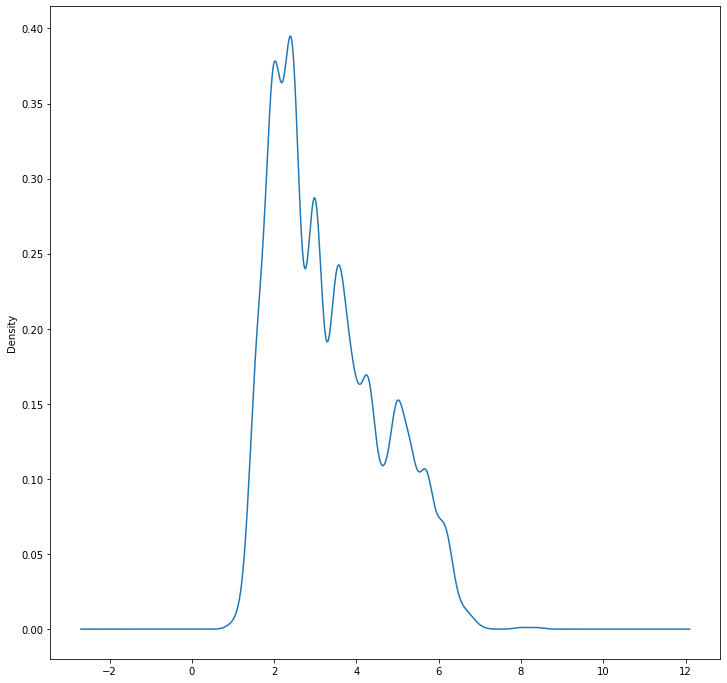

In [156]:
vehicles.displ.plot.kde()

Displ variable has a positive symmetry coefficient clearly higher left weighted

In [157]:
from scipy import stats

In [158]:
stats.skew(vehicles.displ)

0.6267820075196722

Ther are two ways to correct this kind of problems and make our models better

### Normalising

Also called min-max scalling

It converts any numerical variable whatever its range into a range[0,1] (Many deep learning models requires it)

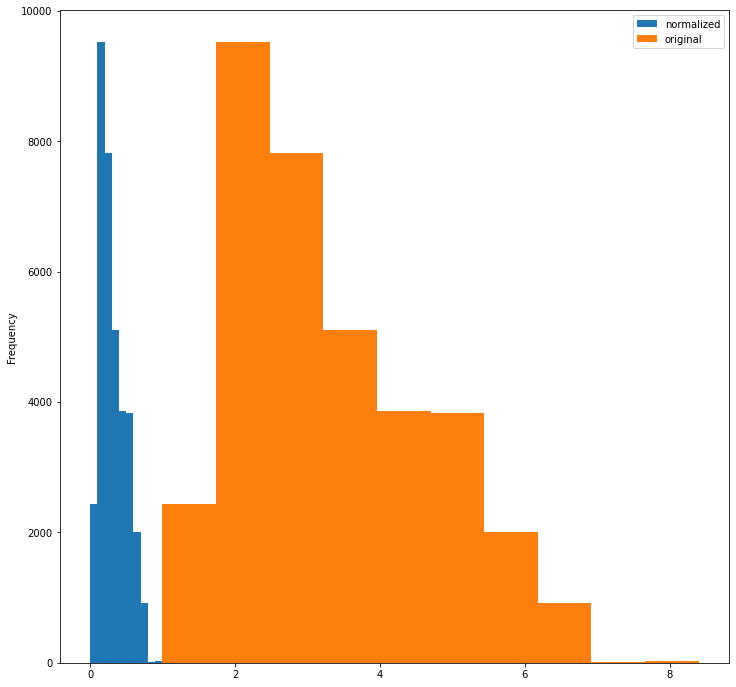

In [159]:
displ_x_min = vehicles.displ.min()
displ_x_max = vehicles.displ.max()

original_displ = vehicles.displ
normalized_displ = original_displ.apply(lambda x: (x-displ_x_min) / (displ_x_max - displ_x_min))

normalized_displ.plot.hist(label="normalized")
original_displ.plot.hist(label="original")
plt.legend()


### Standardization

The goal of standardization is to re-scale the variable to a distribution with mean=0 and standard deviation = 1

Standardization is performed easily by converting each value to its Z score

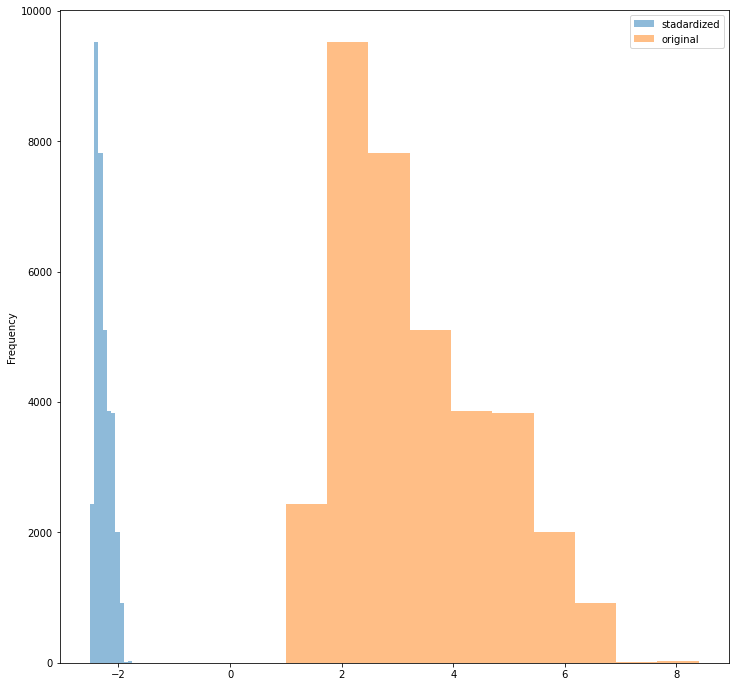

In [160]:
displ_mu = vehicles.displ.mean()
displ_sigma = vehicles.displ.std()

standardized_displ = normalized_displ.apply(lambda x: (x-displ_mu) / (displ_sigma))


standardized_displ.plot.hist(label="stadardized", alpha=0.5)
original_displ.plot.hist(label="original", alpha=0.5)
plt.legend()

For instance, we are performing a dispersion graph to compare displ and CO2 variables depending on whether they are standardized or normalized

In [161]:
consumption_original = vehicles.consumption

consumption_mu = vehicles.consumption.mean()
consumption_sigma = vehicles.consumption.std()
consumption_min = vehicles.consumption.min()
consumption_max = vehicles.consumption.max()

consumption_standardized = consumption_original.apply(lambda x: (x-consumption_mu)/consumption_sigma)
consumption_normalized = consumption_original.apply(lambda x: (x-consumption_min)/ (consumption_max - consumption_min))

Text(0, 0.5, 'displ')

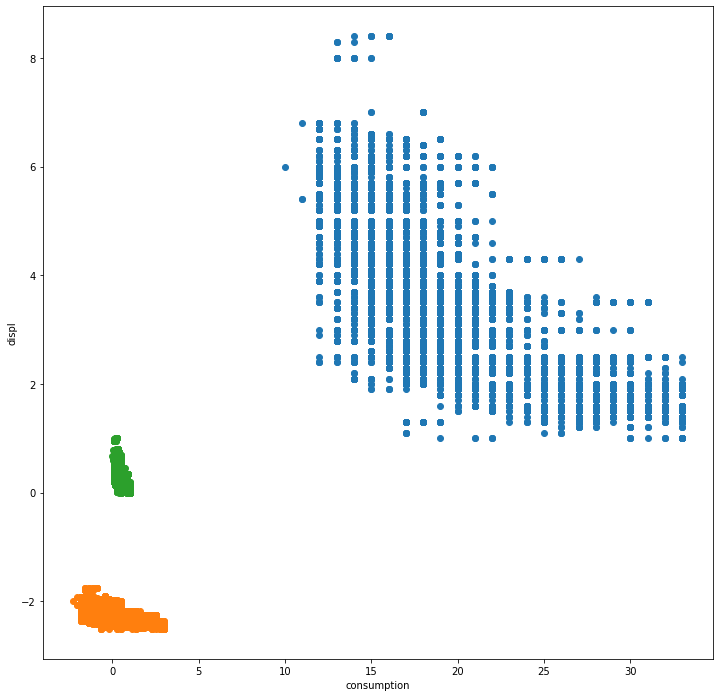

In [162]:
plt.scatter(x=consumption_original, y=original_displ, label="original")
plt.scatter(x=consumption_standardized, y=standardized_displ, label="standardized")
plt.scatter(x=consumption_normalized, y=normalized_displ, label="normalized")

plt.xlabel("consumption")
plt.ylabel("displ")

In [163]:
vehicles["consumption_std"] = consumption_standardized
vehicles["displ_std"] = standardized_displ

In [164]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,consumption_std,displ_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-2.356095
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,-2.181824
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-2.356095
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,-2.181824
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,-2.222829


Finally, we save the clean dataset as csv

In [165]:
vehicles.to_csv("../data/vehicles_processed.csv")